In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.constants as sc

In [152]:
def printProgress (iteration, total, prefix = '', suffix = '', decimals = 1, barLength = 100):
    formatStr = "{0:." + str(decimals) + "f}"
    percent = formatStr.format(100 * (iteration / float(total)))
    filledLength = int(round(barLength * iteration / float(total)))
    bar = '#' * filledLength + '-' * (barLength - filledLength)
    sys.stdout.write('\r%s |%s| %s%s %s' % (prefix, bar, percent, '%', suffix)),
    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

In [171]:
def _dis(alpha):
    r = random.uniform(0,2) # r = 0 ~ +2.0
    z = r - 1 # z = -1.0 ~ +1.0
    _dis = alpha * z # dis = -alpha ~ +alpha
    return _dis

def _E(n):
    const = 1
    _E = const*n**2
    return _E

def _delta_E(x_f,x_i):
    _delta_E = _E(x_f) - _E(x_i)
    return _delta_E

print("Function done")

Function done


In [189]:
sample_rate = 1000
A = [0]*sample_rate
sight_range = 5
sample_interval = (sight_range*2)/sample_rate

for i in range(sample_rate) :
    A[i] = -sight_range + i*sample_interval
    printProgress(i, sample_rate, barLength = 50)
    
print("Sampling ready")

 |##################################################| 99.9% Sampling ready


In [190]:
epoch = 1000000
alpha = 10
x = [0]*(epoch +1)
E = 0
k_b_dot_T = 1
N = [0]*sample_rate

for i in range(epoch):
    x[i+1] = x[i] + _dis(alpha)
    delta_E = _delta_E(x[i+1],x[i])
    if delta_E <= 0 :
        x[i+1] = x[i+1]
    if delta_E > 0 :
        rand = random.uniform(0,1)
        if rand <= math.exp(-delta_E/(k_b_dot_T)) :
            x[i+1] = x[i+1]
        if rand > math.exp(-delta_E/(k_b_dot_T)) :
            x[i+1] = x[i]
    E_avg += _E(x[i+1])/epoch
    for j in range(sample_rate) :
        if x[i+1] > (A[j] - sample_interval/2) :
            if x[i+1] <= (A[j] + sample_interval/2) :
                N[j] = N[j] + 1
                break
    printProgress(i, epoch, barLength = 50)

print()
print("E_avg =", E_avg)
print("Process done")

 |##################################################| 100.0% 
E_avg = 0.5019613283635393
Process done


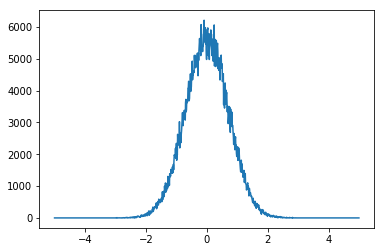

Plot done


In [191]:
plt.plot(A,N)
plt.show()
print("Plot done")